# CH3133 - Computational Practicum - Q1 - Lecture coding 6

Import packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Boundary value problems (BVP)

We model a Newtonian fluid with viscosity $\mu$ undergoing laminar pressure-driven flow between two parallel and infinite plates. One plate moves with $v_{up}$ and the distance between the plates is $B$.

$\mu \frac{d^2v}{dy^2}=\frac{\Delta P}{\Delta x}$

The known boundary conditions are given as follows.

$v(0)=0,\;v(B)=v_{up}$

We discretize the ODE using the central difference scheme.

$v_0=0$

$v_{i-1}+(-2)v_i+v_{i+1}=\frac{h^2}{\mu}\frac{\Delta P}{\Delta x}$

$v_N=v_{up}$

Define parameters.

In [21]:
B = 5e-3  # m
v_up = 1/6*1e-4  # m/s
dPdx = -0.03  # Pa/m
mu = 1e-3  # -

Define grid.

In [22]:
y = np.linspace(0,B,101)
h = y[1]-y[0]

Define left hand-side matrix $A$.

In [23]:
A = np.zeros((len(y),len(y)))
# boundary conditions
A[0,0] = A [-1,-1] = 1
# central difference
for i in range(1,len(y)-1):
    A[i,i-1] = 1
    A[i,i] = -2
    A[i,i+1] = 1

Define right hand-side vector $b$.

In [24]:
b = np.zeros(len(y))
# boundary conditions
b[0] = 0
b[-1] = v_up
# central difference
b[1:-2] = h**2/mu*dPdx

Solve linear equation system.

In [25]:
v = np.linalg.solve(A,b)

Plot the results.

/tmp/ipykernel_2420/807267739.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_2420/807267739.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


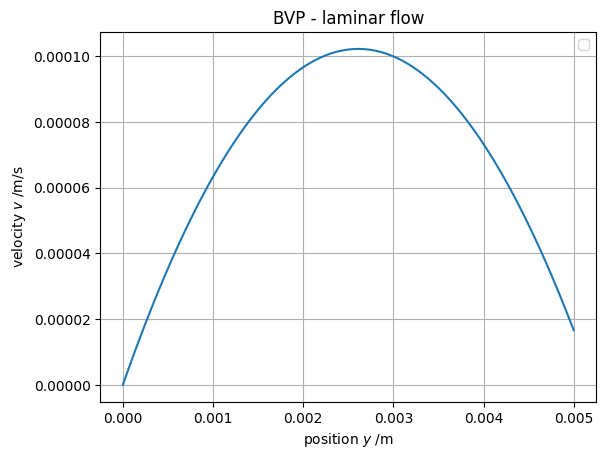

In [26]:
fig, ax = plt.subplots()
ax.plot(y, v)
ax.set_xlabel("position $y$ /m")
ax.set_ylabel("velocity $v$ /m/s")
ax.set_title("BVP - laminar flow")
ax.legend()
ax.grid()
fig.show()